In [2]:
import pandas as pd
from google.colab import files

# Upload file
uploaded = files.upload()

# Read dataset
file_name = "FAOSTAT_data_en_12-8-2025.csv"
df = pd.read_csv(file_name)

# Split items by both commas and the word 'and'
df_exploded = df.assign(label=df['Item'].str.replace(' and ', ', ', regex=True).str.split(','))

# Explode the list into separate rows
df_exploded = df_exploded.explode('label')

# Clean spaces and make uniform lowercase (optional)
df_exploded['label'] = df_exploded['label'].str.strip().str.title()

# Drop any empty labels (if present)
df_exploded = df_exploded[df_exploded['label'] != '']

# Display preview
print("✅ Exploded and separated dataset:")
display(df_exploded.head(10))

# Save to new file
df_exploded.to_csv("exploded_faostat_clean.csv", index=False)
print("💾 Cleaned file saved as exploded_faostat_clean.csv")


✅ Exploded and separated dataset:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,label
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN,Anise
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN,Badian
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN,Coriander
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN,Cumin
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN,Caraway
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN,Fennel
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN,Juniper Berries
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,344434.0,A,Official figure,NaN,Raw
1,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,kg/ha,484.0,A,Official figure,NaN,Anise
1,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,kg/ha,484.0,A,Official figure,NaN,Badian


💾 Cleaned file saved as exploded_faostat_clean.csv


In [8]:
import pandas as pd
from google.colab import files

# Upload both datasets
uploaded = files.upload()

# Load datasets
faostat_file = "exploded_faostat_clean.csv"
crop_file = "Crop_recommendation.csv"

df_faostat = pd.read_csv(faostat_file)
df_crop = pd.read_csv(crop_file)

# 🌾 Get unique items directly
# (Assumes FAOSTAT file has 'label' column and crop file has either 'label' or 'crop')
if 'label' in df_faostat.columns:
    unique_faostat_labels = sorted(df_faostat['label'].dropna().unique())
else:
    raise KeyError("No 'label' column found in FAOSTAT dataset")

if 'label' in df_crop.columns:
    unique_crop_labels = sorted(df_crop['label'].dropna().unique())
elif 'crop' in df_crop.columns:
    unique_crop_labels = sorted(df_crop['crop'].dropna().unique())
else:
    raise KeyError("No 'label' or 'crop' column found in Crop Recommendation dataset")

# 🧾 Display results
print(f"🌾 Total unique FAOSTAT labels: {len(unique_faostat_labels)}")
print(unique_faostat_labels)

print(f"\n🌱 Total unique Crop Recommendation labels: {len(unique_crop_labels)}")
print(unique_crop_labels)

# 💾 Optional — Save both as CSVs
pd.DataFrame(unique_faostat_labels, columns=["Unique_FAOSTAT_Labels"]).to_csv("unique_faostat_labels.csv", index=False)
pd.DataFrame(unique_crop_labels, columns=["Unique_Crop_Labels"]).to_csv("unique_crop_labels.csv", index=False)

print("\n💾 Saved as 'unique_faostat_labels.csv' and 'unique_crop_labels.csv'")


🌾 Total unique FAOSTAT labels: 127
['Anise', 'Apples', 'Apricots', 'Areca Nuts', 'Aromatic Crops', 'Badian', 'Bananas', 'Barley', 'Beans', 'Broccoli', 'Cabbages', 'Cantaloupes', 'Caraway', 'Cardamoms', 'Carrots', 'Cashew Nuts', 'Cassava', 'Castor Oil Seeds', 'Cauliflowers', 'Cherries', 'Chick Peas', 'Chicory', 'Chillies', 'Clementines', 'Cocoa Beans', 'Coconuts', 'Coffee', 'Coir', 'Coriander', 'Cucumbers', 'Cumin', 'Dry', 'Dry (Capsicum Spp.', 'Dry (Excluding Dehydrated)', 'Eggplants (Aubergines)', 'Excluding Shelled', 'Fennel', 'Figs', 'Fresh', 'Fresh N.E.C.', 'Fruits Of The Genus Vaccinium N.E.C.', 'Gherkins', 'Ginger', 'Gourds', 'Grapefruits', 'Grapes', 'Green', 'Green (Capsicum Spp.', 'Green Garlic', 'Groundnuts', 'Guavas', 'In Shell', 'Juniper Berries', 'Jute', 'Kenaf', 'Lemons', 'Lentils', 'Lettuce', 'Limes', 'Linseed', 'Mace', 'Maize (Corn)', 'Mandarins', 'Mangoes', 'Mangosteens', 'Millet', 'Mushrooms', 'N.E.C.', 'Natural Rubber In Primary Forms', 'Nectarines', 'Nutmeg', 'Okra',

In [11]:
# ✅ Robust common-items comparison with singular/plural handled correctly
import pandas as pd
import re
!pip -q install inflect

import inflect
p = inflect.engine()

def normalize_label(text: str) -> str:
    """
    Lowercase, trim, and singularize words so apples==apple, bananas==banana.
    Works well for simple crop names. Keeps spaces/hyphens.
    """
    if not isinstance(text, str):
        return text
    s = re.sub(r'\s+', ' ', text.strip().lower())
    # Split but keep delimiters so we preserve spaces/hyphens in multiword names
    parts = re.split(r'([ \-])', s)
    out = []
    for part in parts:
        # Only try to singularize alphabetic words (skip delimiters)
        if part.isalpha():
            sing = p.singular_noun(part)
            out.append(sing if sing else part)
        else:
            out.append(part)
    return ''.join(out)

from google.colab import files
uploaded = files.upload()

faostat_file = "exploded_faostat_clean.csv"
crop_file = "Crop_recommendation.csv"

df_faostat = pd.read_csv(faostat_file)
df_crop = pd.read_csv(crop_file)

# Pick label/crop columns
if 'label' in df_faostat.columns:
    faostat_raw = df_faostat['label'].dropna().astype(str)
else:
    raise KeyError("FAOSTAT file must contain a 'label' column")

if 'label' in df_crop.columns:
    crop_raw = df_crop['label'].dropna().astype(str)
elif 'crop' in df_crop.columns:
    crop_raw = df_crop['crop'].dropna().astype(str)
else:
    raise KeyError("Crop file must contain 'label' or 'crop' column")

# Normalize for comparison
faostat_norm = set(faostat_raw.map(normalize_label))
crop_norm = set(crop_raw.map(normalize_label))

# Common items (singular/plural handled)
common_items = sorted(faostat_norm.intersection(crop_norm))

print(f"✅ Total common items (plural/singular handled): {len(common_items)}")
print(common_items)

# (Optional) Save to CSV
pd.DataFrame(common_items, columns=["Common_Items"]).to_csv("common_items.csv", index=False)
print("💾 Saved as common_items.csv")


✅ Total common items (plural/singular handled): 12
['apple', 'banana', 'coconut', 'coffee', 'grape', 'jute', 'lentil', 'mango', 'orange', 'papaya', 'rice', 'watermelon']
💾 Saved as common_items.csv


In [9]:
import pandas as pd
from google.colab import files

# Upload both datasets
uploaded = files.upload()

# Load datasets
faostat_file = "exploded_faostat_clean.csv"
crop_file = "Crop_recommendation.csv"

df_faostat = pd.read_csv(faostat_file)
df_crop = pd.read_csv(crop_file)

# 🌾 Get unique labels directly (no normalization)
if 'label' in df_faostat.columns:
    faostat_labels = set(df_faostat['label'].dropna().unique())
else:
    raise KeyError("No 'label' column found in FAOSTAT dataset")

if 'label' in df_crop.columns:
    crop_labels = set(df_crop['label'].dropna().unique())
elif 'crop' in df_crop.columns:
    crop_labels = set(df_crop['crop'].dropna().unique())
else:
    raise KeyError("No 'label' or 'crop' column found in Crop Recommendation dataset")

# 🔗 Find common items
common_items = sorted(list(faostat_labels.intersection(crop_labels)))

# 🧾 Display results
print(f"✅ Total common items between FAOSTAT and Crop Recommendation datasets: {len(common_items)}")
print(common_items)

# 💾 Optional — Save common items to CSV
pd.DataFrame(common_items, columns=["Common_Items"]).to_csv("common_items.csv", index=False)
print("\n💾 Saved common items as 'common_items.csv'")


✅ Total common items between FAOSTAT and Crop Recommendation datasets: 0
[]

💾 Saved common items as 'common_items.csv'


In [13]:
import pandas as pd
import inflect, re
from google.colab import files

p = inflect.engine()

def normalize_label(text: str) -> str:
    if not isinstance(text, str):
        return text
    s = re.sub(r'\s+', ' ', text.strip().lower())
    parts = re.split(r'([ \-])', s)
    out = []
    for part in parts:
        if part.isalpha():
            sing = p.singular_noun(part)
            out.append(sing if sing else part)
        else:
            out.append(part)
    return ''.join(out)

# Upload files if needed
uploaded = files.upload()

faostat_file = "exploded_faostat_clean.csv"
crop_file = "Crop_recommendation.csv"

df_faostat = pd.read_csv(faostat_file)
df_crop = pd.read_csv(crop_file)

# Normalize and prepare labels
df_faostat['norm_label'] = df_faostat['label'].astype(str).map(normalize_label)
if 'label' in df_crop.columns:
    df_crop['norm_label'] = df_crop['label'].astype(str).map(normalize_label)
elif 'crop' in df_crop.columns:
    df_crop['norm_label'] = df_crop['crop'].astype(str).map(normalize_label)

# 🔗 Perform outer and inner joins
outer_join = pd.merge(df_faostat, df_crop, on='norm_label', how='outer', indicator=True)
inner_join = pd.merge(df_faostat, df_crop, on='norm_label', how='inner')

# 🌾 Get summary
common_labels = sorted(inner_join['norm_label'].unique())
outer_only_faostat = sorted(outer_join.loc[outer_join['_merge'] == 'left_only', 'norm_label'].unique())
outer_only_crop = sorted(outer_join.loc[outer_join['_merge'] == 'right_only', 'norm_label'].unique())

print(f"✅ True overlapping crops in both datasets (after join): {len(common_labels)}")
print(common_labels)

print(f"\n🌾 Present only in FAOSTAT dataset: {len(outer_only_faostat)}")
print(outer_only_faostat)

print(f"\n🌱 Present only in Crop Recommendation dataset: {len(outer_only_crop)}")
print(outer_only_crop)


✅ True overlapping crops in both datasets (after join): 12
['apple', 'banana', 'coconut', 'coffee', 'grape', 'jute', 'lentil', 'mango', 'orange', 'papaya', 'rice', 'watermelon']

🌾 Present only in FAOSTAT dataset: 115
['anise', 'apricot', 'areca nut', 'aromatic crop', 'badian', 'barley', 'bean', 'broccoli', 'cabbage', 'cantaloupe', 'caraway', 'cardamom', 'carrot', 'cashew nut', 'cassava', 'castor oil seed', 'cauliflower', 'cherry', 'chick pea', 'chicory', 'chilly', 'clementine', 'cocoa bean', 'coir', 'coriander', 'cucumber', 'cumin', 'dry', 'dry (capsicum spp.', 'dry (excluding dehydrated)', 'eggplant (aubergines)', 'excluding shelled', 'fennel', 'fig', 'fresh', 'fresh n.e.c.', 'fruit of the genu vaccinium n.e.c.', 'gherkin', 'ginger', 'gourd', 'grapefruit', 'green', 'green (capsicum spp.', 'green garlic', 'groundnut', 'guava', 'in shell', 'juniper berry', 'kenaf', 'lemon', 'lettuce', 'lime', 'linseed', 'mace', 'maize (corn)', 'mandarin', 'mangosteen', 'millet', 'mushroom', 'n.e.c.', '

In [14]:
import pandas as pd
import inflect, re
from google.colab import files

# Setup lemmatizer
p = inflect.engine()

def normalize_label(text: str) -> str:
    if not isinstance(text, str):
        return text
    s = re.sub(r'\s+', ' ', text.strip().lower())
    parts = re.split(r'([ \-])', s)
    out = []
    for part in parts:
        if part.isalpha():
            sing = p.singular_noun(part)
            out.append(sing if sing else part)
        else:
            out.append(part)
    return ''.join(out)

# Upload datasets
uploaded = files.upload()

faostat_file = "exploded_faostat_clean.csv"
crop_file = "Crop_recommendation.csv"

df_faostat = pd.read_csv(faostat_file)
df_crop = pd.read_csv(crop_file)

# Normalize label names
df_faostat['norm_label'] = df_faostat['label'].astype(str).map(normalize_label)
if 'label' in df_crop.columns:
    df_crop['norm_label'] = df_crop['label'].astype(str).map(normalize_label)
elif 'crop' in df_crop.columns:
    df_crop['norm_label'] = df_crop['crop'].astype(str).map(normalize_label)

# Find intersections and differences
faostat_labels = set(df_faostat['norm_label'])
crop_labels = set(df_crop['norm_label'])

common_labels = sorted(faostat_labels.intersection(crop_labels))
only_faostat = sorted(faostat_labels - crop_labels)
only_crop = sorted(crop_labels - faostat_labels)

# ✅ Create side-by-side comparison DataFrame
max_len = max(len(common_labels), len(only_faostat), len(only_crop))

comparison_df = pd.DataFrame({
    "✅ Common (Both)": common_labels + [""] * (max_len - len(common_labels)),
    "🌾 Only in FAOSTAT": only_faostat + [""] * (max_len - len(only_faostat)),
    "🌱 Only in Crop Recommendation": only_crop + [""] * (max_len - len(only_crop))
})

# 🧾 Display result
print(f"✅ Common: {len(common_labels)} | 🌾 Only in FAOSTAT: {len(only_faostat)} | 🌱 Only in Crop Recommendation: {len(only_crop)}")
display(comparison_df.head(25))  # Show top 25 for preview

# 💾 Save the full comparison as CSV
comparison_df.to_csv("crop_comparison_side_by_side.csv", index=False)
print("💾 Saved as 'crop_comparison_side_by_side.csv'")


✅ Common: 12 | 🌾 Only in FAOSTAT: 115 | 🌱 Only in Crop Recommendation: 10


,✅ Common (Both),🌾 Only in FAOSTAT,🌱 Only in Crop Recommendation
0,apple,anise,blackgram
1,banana,apricot,chickpea
2,coconut,areca nut,cotton
3,coffee,aromatic crop,kidneybean
4,grape,badian,maize
5,jute,barley,mothbean
6,lentil,bean,mungbean
7,mango,broccoli,muskmelon
8,orange,cabbage,pigeonpea
9,papaya,cantaloupe,pomegranate


💾 Saved as 'crop_comparison_side_by_side.csv'


In [15]:
import pandas as pd
import inflect, re
from google.colab import files

# ✅ Inflect engine for proper plural→singular handling
p = inflect.engine()

def normalize_label(text: str) -> str:
    """Normalize label names to lowercase + singular form (apple/apples → apple)."""
    if not isinstance(text, str):
        return text
    s = re.sub(r'\s+', ' ', text.strip().lower())
    parts = re.split(r'([ \-])', s)
    out = []
    for part in parts:
        if part.isalpha():
            sing = p.singular_noun(part)
            out.append(sing if sing else part)
        else:
            out.append(part)
    return ''.join(out)

# 📂 Upload datasets
uploaded = files.upload()

faostat_file = "exploded_faostat_clean.csv"
crop_file = "Crop_recommendation.csv"

# 📥 Read datasets
df_faostat = pd.read_csv(faostat_file)
df_crop = pd.read_csv(crop_file)

# 🧹 Normalize labels in both
df_faostat['norm_label'] = df_faostat['label'].astype(str).map(normalize_label)
if 'label' in df_crop.columns:
    df_crop['norm_label'] = df_crop['label'].astype(str).map(normalize_label)
elif 'crop' in df_crop.columns:
    df_crop['norm_label'] = df_crop['crop'].astype(str).map(normalize_label)

# 🔗 Inner join on normalized crop labels
merged_df = pd.merge(df_faostat, df_crop, on='norm_label', how='inner')

# 🧾 Show summary
print(f"✅ Merged dataset created successfully!")
print(f"🔸 Total merged rows: {merged_df.shape[0]}")
print(f"🔹 Total common crop labels: {merged_df['norm_label'].nunique()}")
print("\n🌾 Common crops in merged dataset:")
print(sorted(merged_df['norm_label'].unique()))

# 💾 Save merged dataset
merged_df.to_csv("merged_crop_datasets.csv", index=False)
print("\n💾 Saved merged dataset as 'merged_crop_datasets.csv'")

# Optional: Display first few rows
merged_df.head(10)


✅ Merged dataset created successfully!
🔸 Total merged rows: 86400
🔹 Total common crop labels: 12

🌾 Common crops in merged dataset:
['apple', 'banana', 'coconut', 'coffee', 'grape', 'jute', 'lentil', 'mango', 'orange', 'papaya', 'rice', 'watermelon']

💾 Saved merged dataset as 'merged_crop_datasets.csv'


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,label_x,norm_label,N,P,K,temperature,humidity,ph,rainfall,label_y
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1341.0,Apples,2000,2000,...,Apples,apple,24,128,196,22.750888,90.694892,5.521467,110.431786,apple
1,QCL,Crops and livestock products,356,India,5312,Area harvested,1341.0,Apples,2000,2000,...,Apples,apple,7,144,197,23.849401,94.348150,6.133221,114.051249,apple
2,QCL,Crops and livestock products,356,India,5312,Area harvested,1341.0,Apples,2000,2000,...,Apples,apple,14,128,205,22.608010,94.589006,6.226290,116.039659,apple
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1341.0,Apples,2000,2000,...,Apples,apple,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
4,QCL,Crops and livestock products,356,India,5312,Area harvested,1341.0,Apples,2000,2000,...,Apples,apple,20,129,201,23.410447,91.699133,5.587906,116.077793,apple
5,QCL,Crops and livestock products,356,India,5312,Area harvested,1341.0,Apples,2000,2000,...,Apples,apple,32,137,204,22.860066,93.128599,5.824152,117.729673,apple
6,QCL,Crops and livestock products,356,India,5312,Area harvested,1341.0,Apples,2000,2000,...,Apples,apple,27,139,205,22.484030,93.408192,5.772180,105.547363,apple
7,QCL,Crops and livestock products,356,India,5312,Area harvested,1341.0,Apples,2000,2000,...,Apples,apple,0,123,205,22.027754,92.961295,5.790993,121.134918,apple
8,QCL,Crops and livestock products,356,India,5312,Area harvested,1341.0,Apples,2000,2000,...,Apples,apple,22,144,196,21.911913,91.687481,6.499227,117.076128,apple
9,QCL,Crops and livestock products,356,India,5312,Area harvested,1341.0,Apples,2000,2000,...,Apples,apple,1,124,199,23.710591,93.273924,5.658474,112.667659,apple


In [16]:
import pandas as pd
import inflect, re
from google.colab import files

# ✅ Setup plural → singular conversion
p = inflect.engine()

def normalize_label(text: str) -> str:
    """Normalize crop names: lowercase, singular, trimmed."""
    if not isinstance(text, str):
        return text
    s = re.sub(r'\s+', ' ', text.strip().lower())
    parts = re.split(r'([ \-])', s)
    out = []
    for part in parts:
        if part.isalpha():
            sing = p.singular_noun(part)
            out.append(sing if sing else part)
        else:
            out.append(part)
    return ''.join(out)

# 📂 Upload datasets
uploaded = files.upload()

faostat_file = "exploded_faostat_clean.csv"
crop_file = "Crop_recommendation.csv"

# 📥 Load data
df_faostat = pd.read_csv(faostat_file)
df_crop = pd.read_csv(crop_file)

# 🧹 Normalize crop labels
df_faostat['norm_label'] = df_faostat['label'].astype(str).map(normalize_label)
if 'label' in df_crop.columns:
    df_crop['norm_label'] = df_crop['label'].astype(str).map(normalize_label)
elif 'crop' in df_crop.columns:
    df_crop['norm_label'] = df_crop['crop'].astype(str).map(normalize_label)

# 🔗 Merge on normalized crop names
merged_df = pd.merge(df_faostat, df_crop, on='norm_label', how='inner')

print(f"✅ Merged rows before filtering: {merged_df.shape[0]}")

# 🚫 Remove unwanted columns
columns_to_drop = [
    'Domain Code', 'Domain', 'Area Code (M49)', 'Area',
    'Element Code', 'Item Code (CPC)', 'Item',
    'Year Code', 'Year', 'Unit',
    'Flag Description', 'Note', 'label_x', 'label_y'
]
merged_df.drop(columns=[c for c in columns_to_drop if c in merged_df.columns], inplace=True, errors='ignore')

# 🧹 Remove rows where Element is 'Yield' or 'Area harvested'
merged_df = merged_df[~merged_df['Element'].isin(['Yield', 'Area harvested'])]

# ✅ Reset index and rename columns if needed
merged_df.reset_index(drop=True, inplace=True)

# 🧾 Display summary
print(f"✅ Cleaned dataset ready for EDA!")
print(f"🔸 Rows after filtering: {merged_df.shape[0]}")
print(f"🔹 Unique crops: {merged_df['norm_label'].nunique()}")

# 💾 Save cleaned file
merged_df.to_csv("merged_cleaned_dataset.csv", index=False)
print("\n💾 Saved as 'merged_cleaned_dataset.csv'")

# 🔍 Preview cleaned dataset
merged_df.head(10)


✅ Merged rows before filtering: 86400
✅ Cleaned dataset ready for EDA!
🔸 Rows after filtering: 28800
🔹 Unique crops: 12

💾 Saved as 'merged_cleaned_dataset.csv'


,Element,Value,Flag,norm_label,N,P,K,temperature,humidity,ph,rainfall
0,Production,1050000.0,A,apple,24,128,196,22.750888,90.694892,5.521467,110.431786
1,Production,1050000.0,A,apple,7,144,197,23.849401,94.348150,6.133221,114.051249
2,Production,1050000.0,A,apple,14,128,205,22.608010,94.589006,6.226290,116.039659
3,Production,1050000.0,A,apple,8,120,201,21.186674,91.134357,6.321152,122.233323
4,Production,1050000.0,A,apple,20,129,201,23.410447,91.699133,5.587906,116.077793
5,Production,1050000.0,A,apple,32,137,204,22.860066,93.128599,5.824152,117.729673
6,Production,1050000.0,A,apple,27,139,205,22.484030,93.408192,5.772180,105.547363
7,Production,1050000.0,A,apple,0,123,205,22.027754,92.961295,5.790993,121.134918
8,Production,1050000.0,A,apple,22,144,196,21.911913,91.687481,6.499227,117.076128
9,Production,1050000.0,A,apple,1,124,199,23.710591,93.273924,5.658474,112.667659


In [17]:
import pandas as pd
from google.colab import files

# 📥 Upload the merged_cleaned_dataset
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("merged_cleaned_dataset.csv")

# 1️⃣ Drop the 'Flag' column if present
if 'Flag' in df.columns:
    df.drop(columns=['Flag'], inplace=True)

# 2️⃣ Move 'norm_label' column to the end and rename it as 'label'
if 'norm_label' in df.columns:
    label_col = df.pop('norm_label')  # remove and store the column
    df['label'] = label_col           # add it back at the end

# 3️⃣ Save the final cleaned dataset
df.to_csv("final_merged_dataset.csv", index=False)

print("✅ Final dataset cleaned and saved as 'final_merged_dataset.csv'")
print("📊 Shape:", df.shape)
print("\n🔹 Columns in final dataset:\n", df.columns.tolist())

# Optional: Preview first few rows
df.head()


✅ Final dataset cleaned and saved as 'final_merged_dataset.csv'
📊 Shape: (28800, 10)

🔹 Columns in final dataset:
 ['Element', 'Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


,Element,Value,N,P,K,temperature,humidity,ph,rainfall,label
0,Production,1050000.0,24,128,196,22.750888,90.694892,5.521467,110.431786,apple
1,Production,1050000.0,7,144,197,23.849401,94.348150,6.133221,114.051249,apple
2,Production,1050000.0,14,128,205,22.608010,94.589006,6.226290,116.039659,apple
3,Production,1050000.0,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
4,Production,1050000.0,20,129,201,23.410447,91.699133,5.587906,116.077793,apple


✅ Dataset loaded successfully!

Shape of dataset: (28800, 10)

Columns in dataset:
 ['Element', 'Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

🔸 Missing Values:
Element        0
Value          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

🔸 Duplicated Rows: 400

🔸 Data Types:
Element         object
Value          float64
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

📈 Summary Statistics:
               count unique         top   freq             mean  \
Element        28800      1  Production  28800              NaN   
Value        28800.0    NaN         NaN    NaN  18919973.469306   
N            28800.0    NaN         NaN    NaN        52.783333   
P            28800.0    NaN         NaN    NaN    

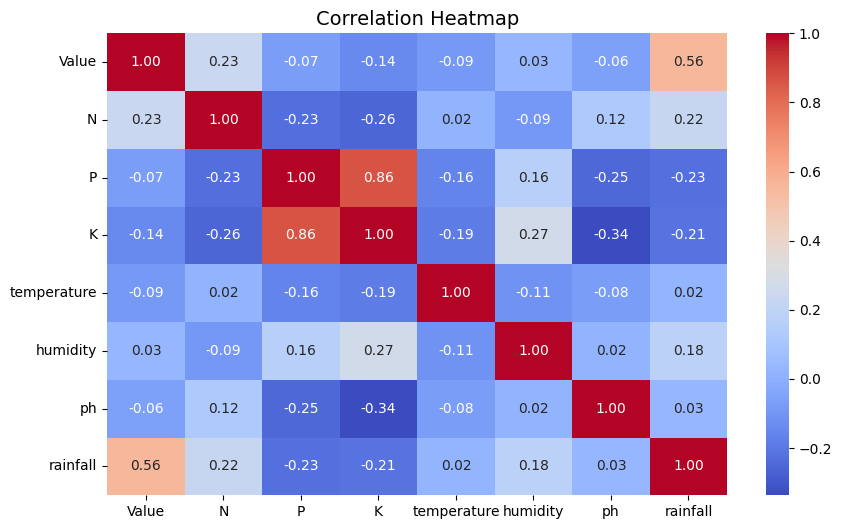


🌾 Crop-wise Average Values:


,label,N,P,K,temperature,humidity,ph,rainfall,Value
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779,2.041537e+06
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980,2.573306e+07
2,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646,1.121363e+07
3,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295,3.024012e+05
4,grape,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829,2.157060e+06
5,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798,1.810336e+06
6,lentil,18.77,68.36,19.41,24.509052,64.804785,6.927932,45.680454,1.091130e+06
7,mango,20.07,27.18,29.92,31.208770,50.156573,5.766373,94.704515,1.732923e+07
8,orange,19.58,16.55,10.01,22.765725,92.170209,7.016957,110.474969,3.418348e+06
9,papaya,49.88,59.05,50.04,33.723859,92.403388,6.741442,142.627839,4.229711e+06


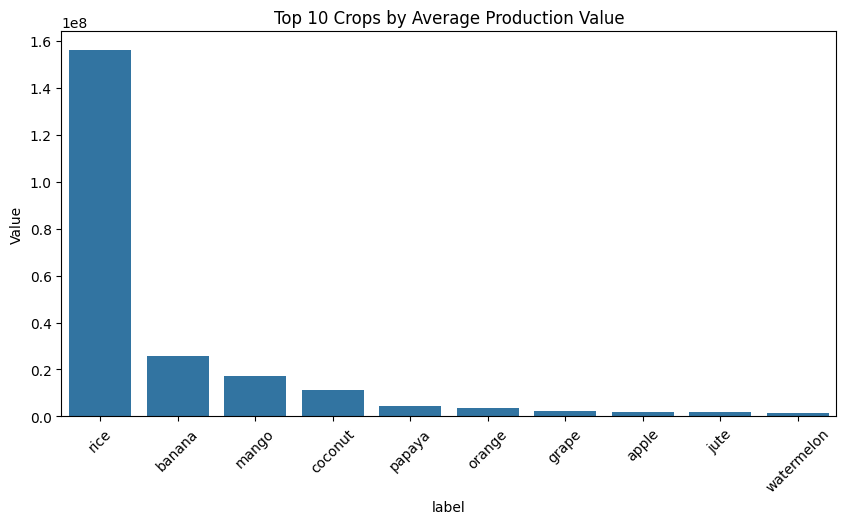

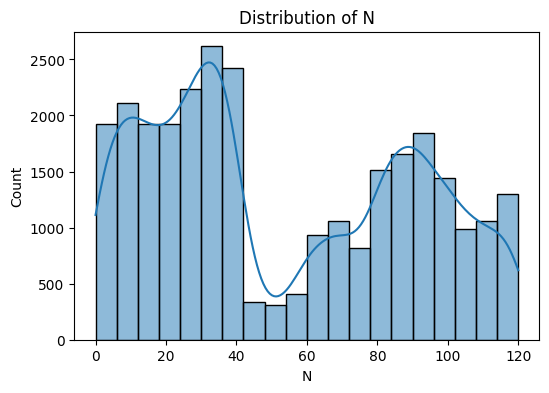

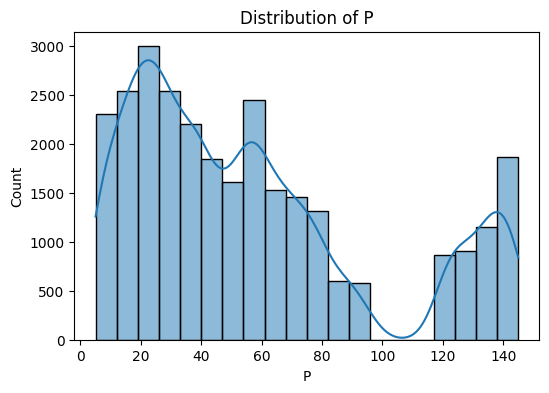

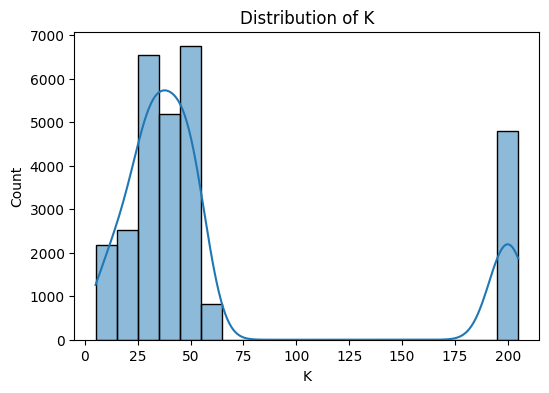

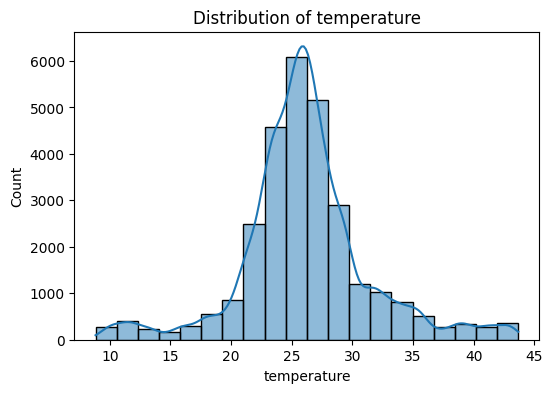

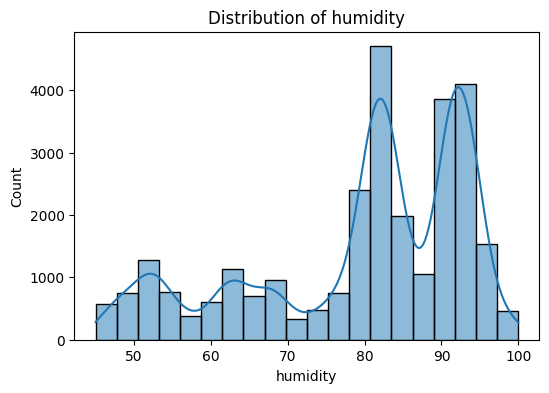

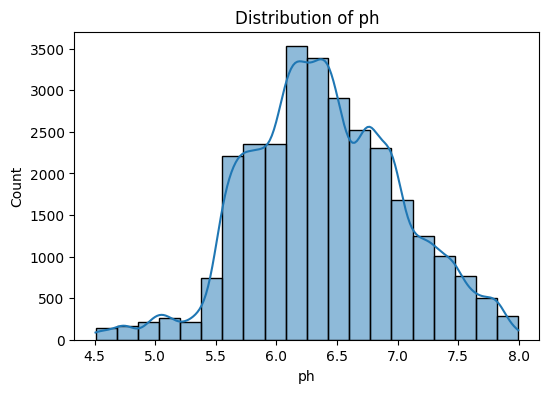

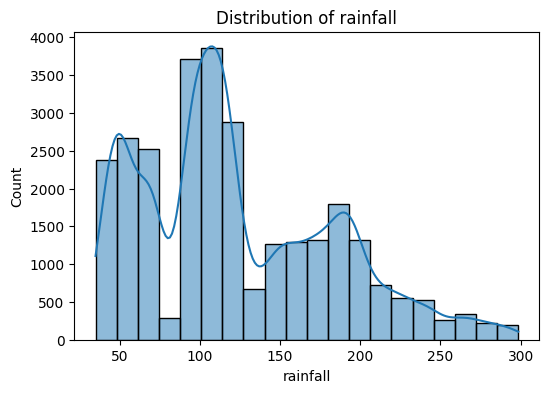

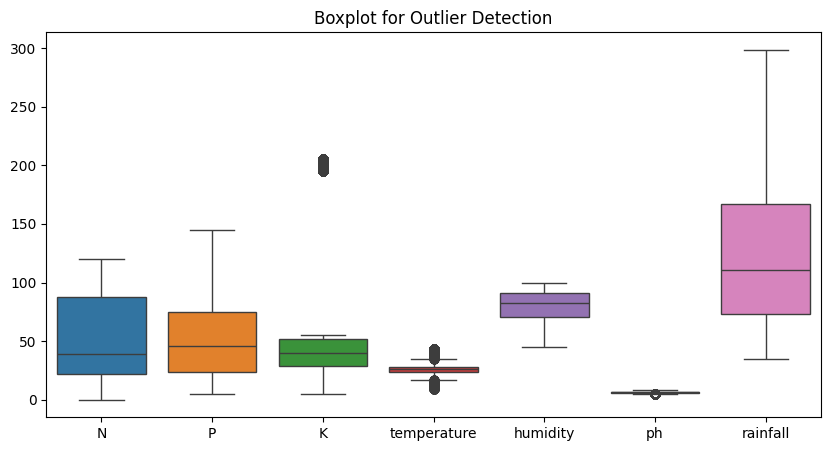

💾 Saved crop-wise summary as 'cropwise_summary.csv'


In [18]:
# =========================================
# 📊 Exploratory Data Analysis (EDA)
# =========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📥 Upload or load dataset
uploaded = files.upload()  # or skip if already present
df = pd.read_csv("final_merged_dataset.csv")

# 🔍 Basic Overview
print("✅ Dataset loaded successfully!\n")
print("Shape of dataset:", df.shape)
print("\nColumns in dataset:\n", df.columns.tolist())

# =============================
# 1️⃣ DATA QUALITY CHECKS
# =============================

print("\n🔸 Missing Values:")
print(df.isnull().sum())

print("\n🔸 Duplicated Rows:", df.duplicated().sum())

print("\n🔸 Data Types:")
print(df.dtypes)

# =============================
# 2️⃣ SUMMARY STATISTICS
# =============================
print("\n📈 Summary Statistics:")
print(df.describe(include='all').T)

# =============================
# 3️⃣ CORRELATION ANALYSIS
# =============================
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr = num_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# =============================
# 4️⃣ CROP-WISE SUMMARY
# =============================

# Average environmental & nutrient conditions by crop
crop_summary = df.groupby('label')[['N','P','K','temperature','humidity','ph','rainfall','Value']].mean().reset_index()

print("\n🌾 Crop-wise Average Values:")
display(crop_summary.head(10))

# Top 10 crops by average production
top_crops = crop_summary.sort_values(by='Value', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_crops, x='label', y='Value')
plt.title("Top 10 Crops by Average Production Value")
plt.xticks(rotation=45)
plt.show()

# =============================
# 5️⃣ DISTRIBUTIONS
# =============================

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
    plt.show()

# =============================
# 6️⃣ OUTLIER CHECKS (optional)
# =============================
plt.figure(figsize=(10,5))
sns.boxplot(data=df[features])
plt.title("Boxplot for Outlier Detection")
plt.show()

# =============================
# 7️⃣ SAVE CROP SUMMARY
# =============================
crop_summary.to_csv("cropwise_summary.csv", index=False)
print("💾 Saved crop-wise summary as 'cropwise_summary.csv'")


In [19]:
import pandas as pd
from google.colab import files

# 📥 Upload your dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv("final_merged_dataset.csv")

# ===============================
# 1️⃣ Check & Handle Missing Values
# ===============================
print("🔍 Checking for missing values...")
missing = df.isnull().sum()
print(missing)

# Drop rows with any missing values (if needed)
if missing.sum() > 0:
    df.dropna(inplace=True)
    print("\n✅ Missing values found and removed.")
else:
    print("\n✅ No missing values found.")

# ===============================
# 2️⃣ Remove Duplicate Rows
# ===============================
duplicates = df.duplicated().sum()
print(f"\n🔍 Found {duplicates} duplicate rows.")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicates removed.")
else:
    print("✅ No duplicates found.")

# ===============================
# 3️⃣ Keep Only 'Production' Rows
# ===============================
before_filter = df.shape[0]
df = df[df['Element'].str.lower() == 'production']
after_filter = df.shape[0]

print(f"\n🔍 Filtered 'Production' rows: {before_filter - after_filter} rows removed.")
print(f"✅ Remaining rows: {after_filter}")

# ===============================
# 4️⃣ Save the Clean Dataset
# ===============================
df.to_csv("final_cleaned_dataset.csv", index=False)
print("\n💾 Clean dataset saved as 'final_cleaned_dataset.csv'")
print("📊 Shape after cleaning:", df.shape)

# Optional: Preview final few rows
df.head(10)


🔍 Checking for missing values...
Element        0
Value          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

✅ No missing values found.

🔍 Found 400 duplicate rows.
✅ Duplicates removed.

🔍 Filtered 'Production' rows: 0 rows removed.
✅ Remaining rows: 28400

💾 Clean dataset saved as 'final_cleaned_dataset.csv'
📊 Shape after cleaning: (28400, 10)


,Element,Value,N,P,K,temperature,humidity,ph,rainfall,label
0,Production,1050000.0,24,128,196,22.750888,90.694892,5.521467,110.431786,apple
1,Production,1050000.0,7,144,197,23.849401,94.348150,6.133221,114.051249,apple
2,Production,1050000.0,14,128,205,22.608010,94.589006,6.226290,116.039659,apple
3,Production,1050000.0,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
4,Production,1050000.0,20,129,201,23.410447,91.699133,5.587906,116.077793,apple
5,Production,1050000.0,32,137,204,22.860066,93.128599,5.824152,117.729673,apple
6,Production,1050000.0,27,139,205,22.484030,93.408192,5.772180,105.547363,apple
7,Production,1050000.0,0,123,205,22.027754,92.961295,5.790993,121.134918,apple
8,Production,1050000.0,22,144,196,21.911913,91.687481,6.499227,117.076128,apple
9,Production,1050000.0,1,124,199,23.710591,93.273924,5.658474,112.667659,apple


✅ Dataset after removing duplicates: (28400, 10)

📊 Model Performance:
R² Score: 0.9638
MAE: 3326470.3734


/tmp/ipython-input-2965812542.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x='Importance', y='Feature', palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


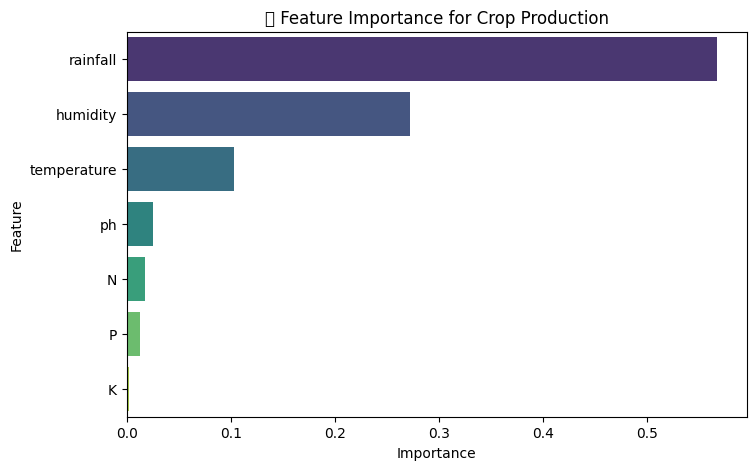


💾 Saved feature importance as 'feature_importance.csv'


In [22]:
# =========================================
# 🌾 Feature Importance Analysis
# =========================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("/content/final_cleaned_dataset.csv")

# 🔧 Remove duplicate rows if any
df = df.drop_duplicates()

print(f"✅ Dataset after removing duplicates: {df.shape}")

# 🎯 Define features (X) and target (y)
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['Value']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# ✅ Model performance
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n📊 Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

# 🔍 Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 📈 Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(data=importance, x='Importance', y='Feature', palette="viridis")
plt.title("🌾 Feature Importance for Crop Production")
plt.show()

# 💾 Save importance scores
importance.to_csv("feature_importance.csv", index=False)
print("\n💾 Saved feature importance as 'feature_importance.csv'")


In [23]:
import numpy as np

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"📉 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


📉 Mean Absolute Percentage Error (MAPE): 38.75%


In [21]:
# ===============================================
# 🌾 Predict Crop Production from User Input
# ===============================================
import numpy as np

# Example input values
# You can modify these values manually or make them user inputs
sample_input = {
    "N": 90,
    "P": 42,
    "K": 43,
    "temperature": 26.5,
    "humidity": 80.0,
    "ph": 6.5,
    "rainfall": 120.0
}

# Convert to DataFrame
input_df = pd.DataFrame([sample_input])

# Predict production using the trained Random Forest model
predicted_value = rf.predict(input_df)[0]

print("\n🌾 Predicted Crop Production Value:")
print(f"Estimated Production: {predicted_value:,.2f} units")

# Optionally, display comparison
importance_sorted = importance.sort_values(by='Importance', ascending=False)
print("\n📊 Top Influential Factors:")
print(importance_sorted)



🌾 Predicted Crop Production Value:
Estimated Production: 1,812,470.00 units

📊 Top Influential Factors:
       Feature  Importance
6     rainfall    0.567639
4     humidity    0.271461
3  temperature    0.103421
5           ph    0.025247
0            N    0.018196
1            P    0.012425
2            K    0.001612


In [24]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Log-transform the target
y_log = np.log1p(df['Value'])  # log(1 + Value)
X = df[['N','P','K','temperature','humidity','ph','rainfall']]

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Predict and inverse-transform
y_pred_log = rf.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

# Evaluate
r2 = r2_score(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

print(f"📊 R² Score: {r2:.4f}")
print(f"📉 MAE: {mae:,.2f}")
print(f"📉 MAPE: {mape:.2f}%")


📊 R² Score: 0.9636
📉 MAE: 3,352,577.33
📉 MAPE: 32.65%
